# Laboratorio 07 Interpolación

#### Métodos computacionales para físicos  y astrónomos
#### Universidad de Antioquia
#### Prof: Hernan D. Salinas Jiménez & Juan Marcos Marín Ramírez

##1. Interpolación Lagrange

Consideremos la función:
\begin{equation*}
     f(x) = \frac{1}{1+25x^2}
\end{equation*}
en el intervalo $[-1, 1]$, definamos un conjunto de puntos $n+1$  equiespaciados en $[-1,1]$.

 1. Representar gráficamente la función junto al polinomio de interpolación de Lagrange, $p_n(x)$, para $n=\{ 4, 8, 12, 16, 20 \}$.
 2. Comprobar gráficamente cómo el error aumenta con $n$. Emplee la libreria, simbolica de sympy y encuente el error en la interpolación.

 Para este numeral, emplee que:


La cota del  error , viene dado por:
\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation},

emplee la libreria simbolica para realizar la estimación de dicha cuota, sólo para n = 4, en el punto 0.5

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
import pandas as pd


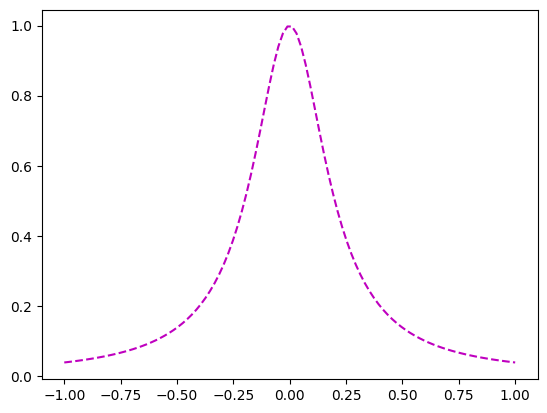

In [4]:
f = lambda x: 1/(1+25*x**2)
x= np.linspace(-1,1,100)

plt. plot(x,f(x), 'm--')

In [5]:
N= 4
n= N+1
x_ = np.linspace(-1,1,n) #puntos a interpolar
PL = lagrange(x_, f(x_)) #funcion de interpolacion
xL = np.linspace(np.min(x_), np.max(x_))
PL

poly1d([ 3.31564987e+00,  1.04083409e-17, -4.27718833e+00,  5.20417043e-18,
        1.00000000e+00])

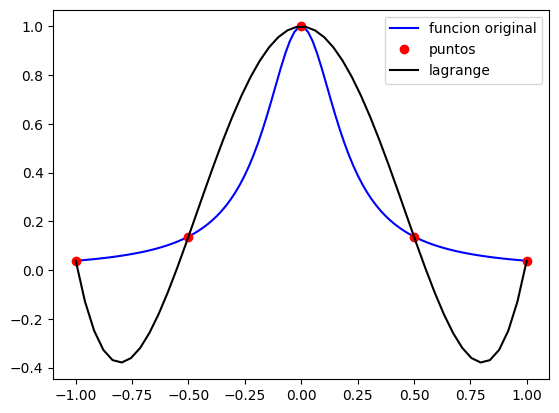

In [6]:
plt.plot(x,f(x), 'b-', label = 'funcion original')
plt.plot(x_,f(x_), 'ro', label='puntos')
plt.plot(xL,PL(xL), 'k-', label= 'lagrange')
plt.legend()

In [7]:
import sympy as sp
sp.init_printing()

f_s= lambda y: 1/(1+25*y**2)
y= sp.symbols('y')
f_s(y)

    1    
─────────
    2    
25⋅y  + 1

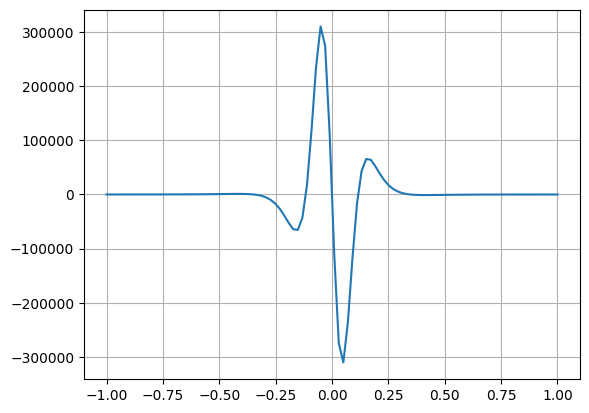

In [8]:
df5= sp.diff(f_s(y),y,5)
f5= sp.lambdify(y, df5,'numpy')

x5= np.linspace(-1,1,100)
plt.plot(x5,f5(x5))
plt.grid()
plt.show()

x_max= np.max(abs(f5(x5)))
x_zeta= np.argmax(abs(f5(x5)))


In [9]:
import math as mt

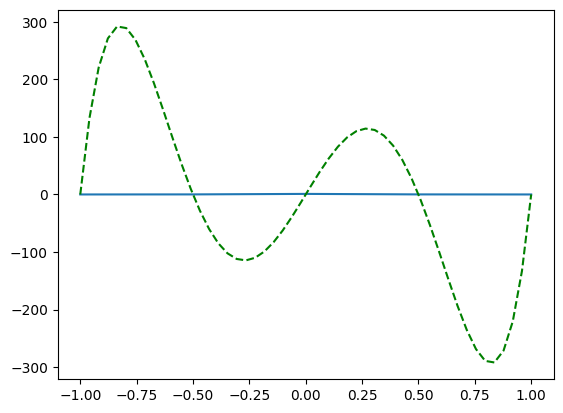

In [10]:
plt.plot(x_,f(x_))
plt.plot(xL, x_max/(mt.factorial(n))*(xL-x_[0])*(xL-x_[1])*(xL-x_[2])*(xL-x_[3])*(xL-x_[4]), 'g--')

##2. Tangente

Para la función $f(x) = \tan (x)$ definida entre $-\frac{\pi}{4}$ y $\frac{\pi}{4}$, usando $N=10$ (9 intervalos). Grafique la función original y aquella interpolada usando Lagrange.

Explore el comportamiento del algoritmo de interpolación lineal al variar el número de datos utilizados.

[-1.         -0.66817864 -0.41421356 -0.19891237  0.          0.19891237
  0.41421356  0.66817864  1.        ]


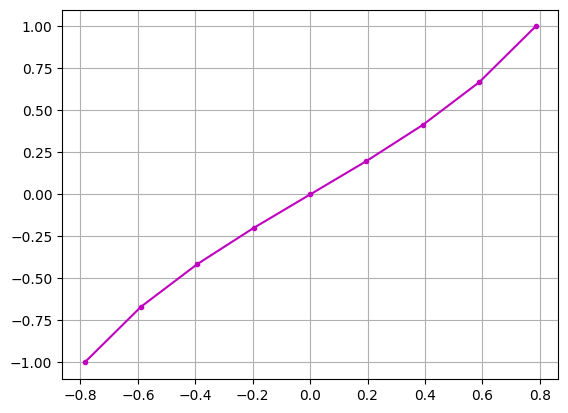

In [11]:
funcion= lambda x: np.tan(x)
x=np.linspace(-np.pi/4,np.pi/4,9)
print(funcion(x))

plt.plot(x,funcion(x), 'm.-')
plt.grid()
plt.show()

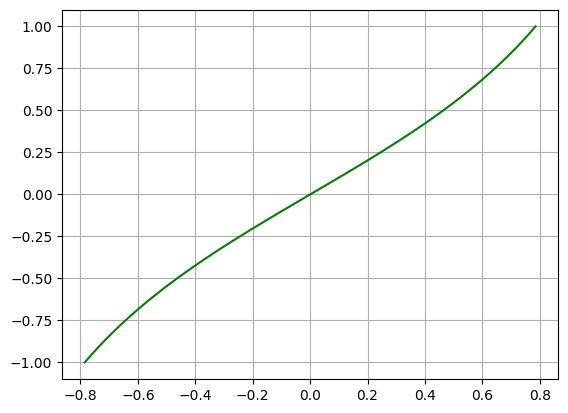

In [12]:
N= 9
n= N+1
xs = np.linspace(-np.pi/4,np.pi/4, n) #puntos a interpolar
PoliL = lagrange(xs, funcion(xs)) #funcion de interpolacion
xL = np.linspace(np.min(xs), np.max(xs))

plt.plot(xL, PoliL(xL), 'g-')
plt.grid()

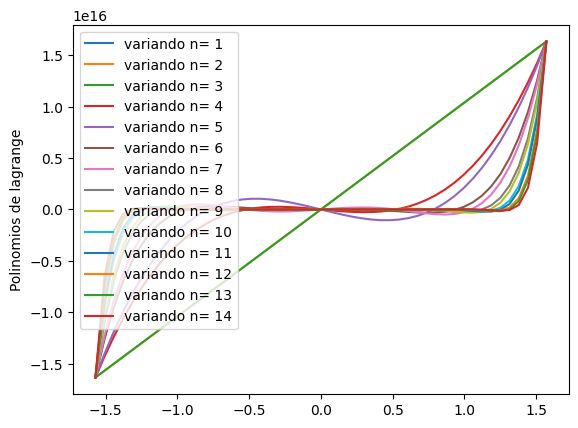

In [13]:
for i in range(1,15):
    xss=np.linspace(-np.pi/2,np.pi/2, i)
    PoliL = lagrange(xss, funcion(xss))
    xxL = np.linspace(np.min(xss), np.max(xss))
    plt.plot(xxL, PoliL(xxL), '-', label=f"variando n= {i}")
    plt.ylabel("Polinomios de lagrange")
    plt.legend()



##3. Datos

Usando los siguientes datos:
```
x =  np.array([1, 1.3, 1.6, 1.9, 2.2])

fx =  np.array([0.7651977,0.6200860, 0.4554022, 0.2818186, 0.1103623])
```
a)  Cree un dataframe y utilizando la interpolación de Lagrange encuentre



valores intermedios, esto es,

```
new_x_range = np.arange(1.1, 2.1, 0.1)
```
b) Haga un gráfico donde muestre los valores originales y aquellos interpolados.

c) Utilizando un método diferente a Lagrange repita el procedimiento y explique si hay alguna diferencia


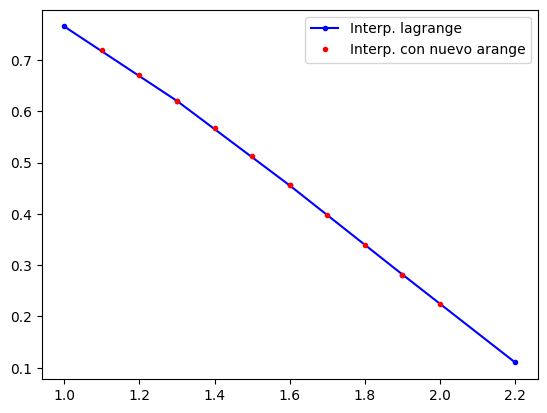

In [14]:
x =  np.array([1, 1.3, 1.6, 1.9, 2.2])
new_x= np.arange(1.1, 2.1, 0.1)

fx =  np.array([0.7651977,0.6200860, 0.4554022, 0.2818186, 0.1103623])
d={"x":x,"fx":fx}
df= pd.DataFrame(d)
plg=lagrange(df["x"],df["fx"])
plt.plot(df["x"],plg(df["x"]), '.b-', label='Interp. lagrange')

plt.plot(new_x,plg(new_x), '.r', label='Interp. con nuevo arange')
plt.legend();

##4. Interpolación en imágenes


# 4. Spline Cúbico

Consideremos la imagen ![paloma](https://github.com/hernansalinas/autogrades/blob/main/Laboratorios_Taller/img/paloma.png?raw=true).




Con los datos dados en la tabla:

1. Representar gráficamente la imagen, usando las órdenes `imread` e `imshow` de python (estas órdenes están contenidas en el paquete `matplotlib`)

2. Definir una lista de puntos, $x_i$,$y_i$ de la paloma.

3. Representar el polinomio de interpolación de Lagrange en estos puntos, para aproximar el dibujo.

4. Repetir el proceso de interpolación mediante *splines* cúbicos. Para ello, utilizar la función `CubicSpline` (contenida en `scipy.interpolate`),


5. Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?

Ref: Metodos numericos, Burden.

In [15]:
import urllib.request
pato='https://3.bp.blogspot.com/-8_LTrCIxVSQ/VxU-5Gq2ffI/AAAAAAAAIto/LhCDEwHKTiAbLr7IhizQwGV13YTwgpbDwCLcB/s400/pato1.png' #URL
urllib.request.urlretrieve(pato, 'pato.jpg')#Decargar la imagen
imagen_pato=plt.imread('pato.jpg') #Variable con la imagen del pato

In [16]:
x= [0.9,1.3,1.9,2.1,2.6,3.0,3.9,4.4,4.7,5.0,6.0,7.0,8.0,9.2,10.5,11.3,11.6,12.0,12.6,13.0,13.3]
y= [1.3,1.5,1.85,2.1,2.6,2.7,2.4,2.15,2.05,2.1,2.25,2.3,2.25,1.95,1.4,0.9,0.7,0.6,0.5,0.4,0.25]

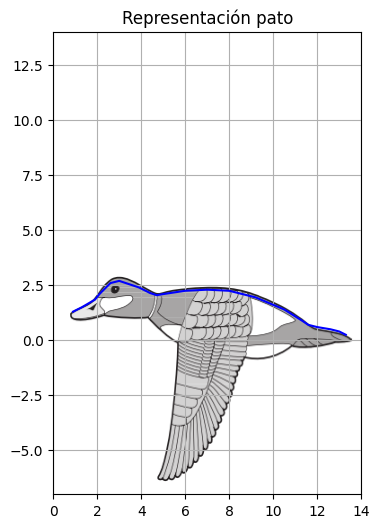

In [38]:
plt.figure(figsize=(6,6))
plt.title("Representación pato")
plt.imshow(imagen_pato,extent=(0.4,14,-6.8,3.45))
plt.plot(x,y, "b")
plt.xlim(0,14)
plt.ylim(-7,14)
plt.grid()

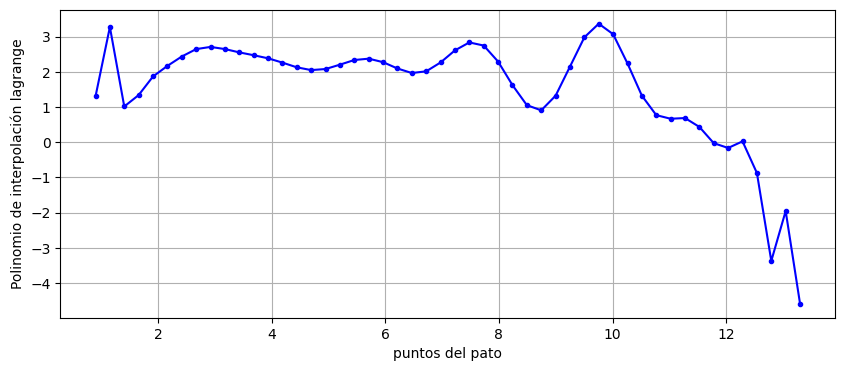

In [45]:
PL1 = lagrange(x, y) #Interpolacion por medio de lagrange
xL1 = np.linspace(np.min(x), np.max(x))
plt.figure(figsize=(10,4))
plt.grid()
plt.xlabel("puntos del pato")
plt.ylabel("Polinomio de interpolación lagrange")
plt.plot(xL1,PL1(xL1), '.b-', label= 'lagrange',);


In [19]:
from scipy.interpolate import CubicSpline

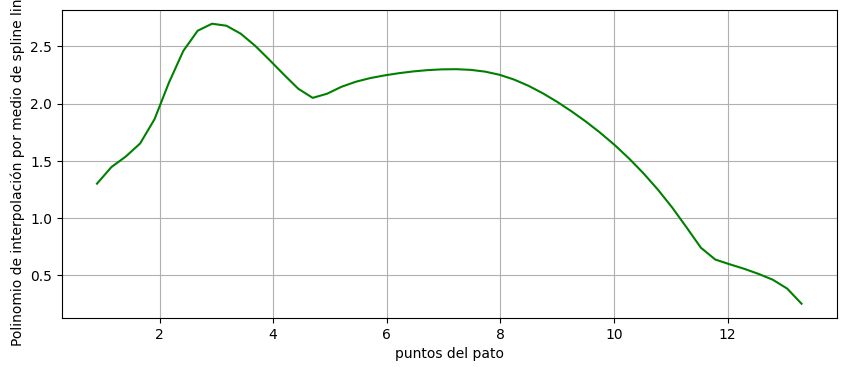

In [44]:
pcs=CubicSpline(x,y)
xL2 = np.linspace(np.min(x), np.max(x))
plt.figure(figsize=(10,4))
plt.grid()
plt.xlabel("puntos del pato")
plt.ylabel("Polinomio de interpolación por medio de spline lines")
plt.plot(xL2,pcs(xL2), 'g-', label= 'splinecubics',);